In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
Iris = pd.read_csv("/content/IRIS.csv")
print(Iris.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [4]:
print ("The shape of the  data is (row, column):"+ str(Iris.shape))
print (Iris.info())

The shape of the  data is (row, column):(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
Iris['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [6]:
Iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
Iris.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


<Axes: >

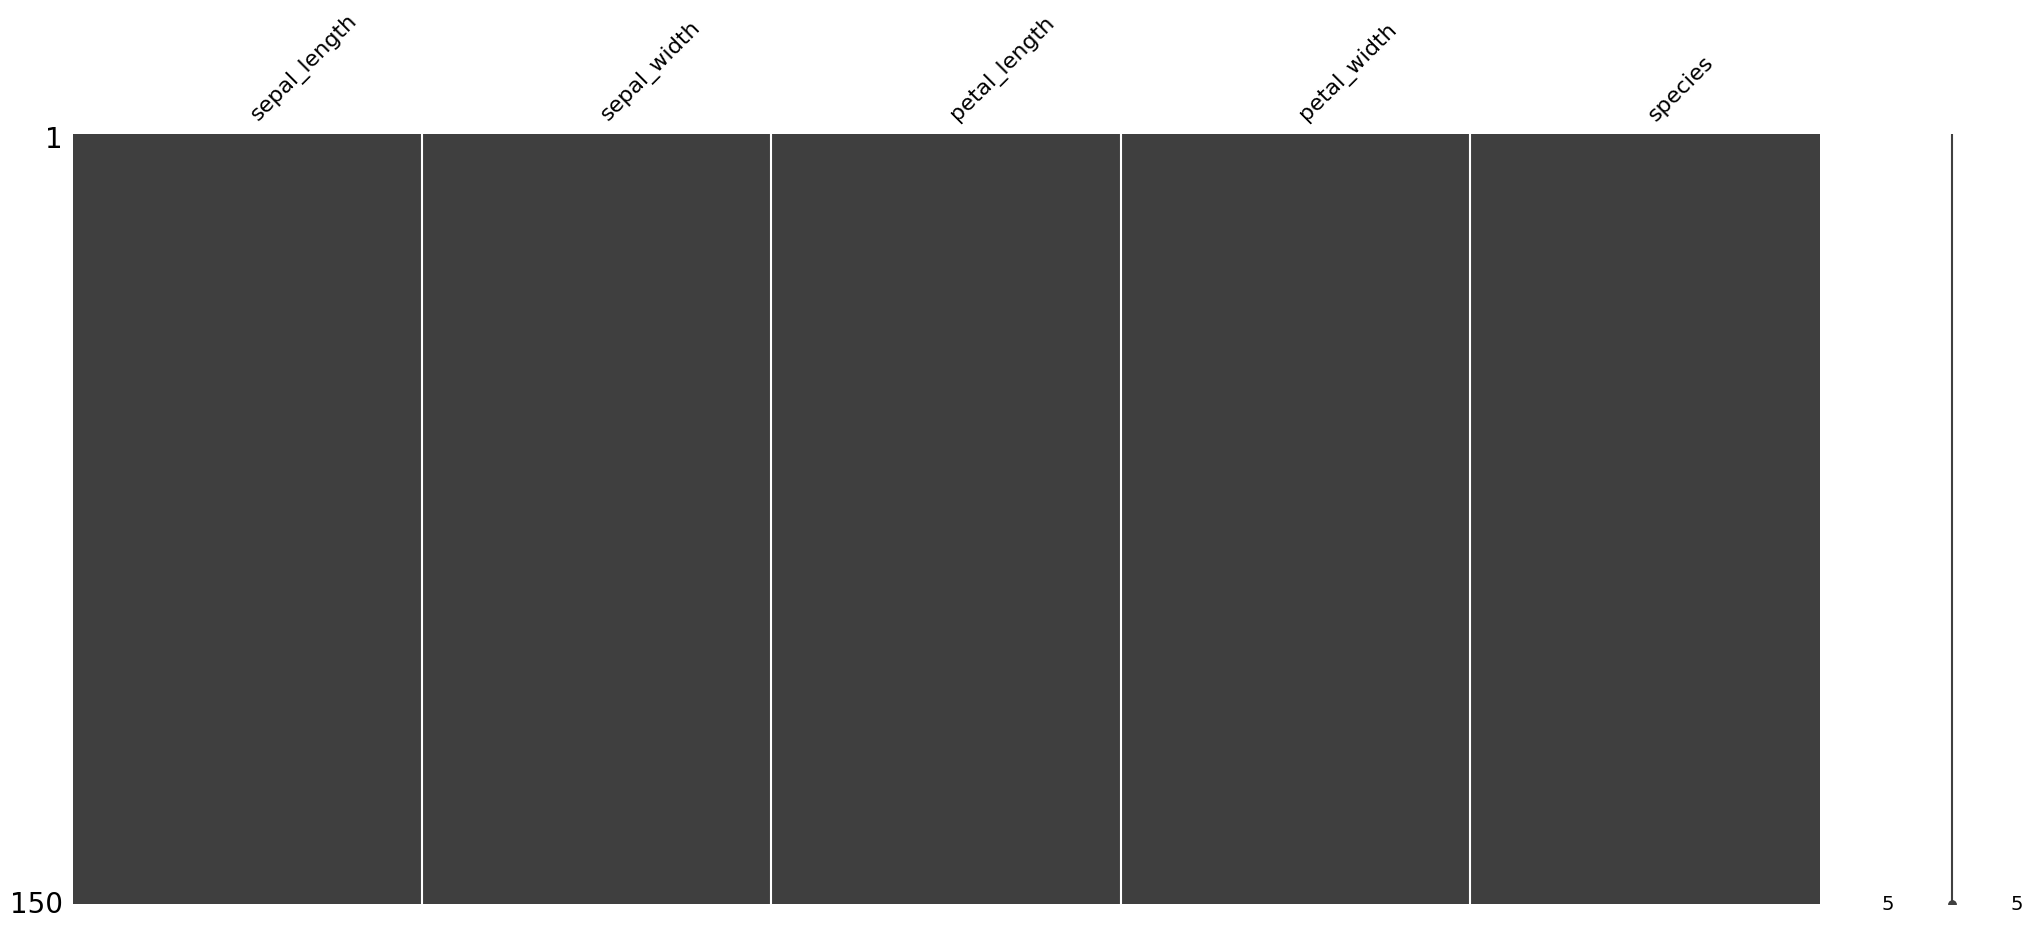

In [8]:
import missingno as msno
msno.matrix(Iris)

<ipython-input-9-08a4cdce840f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, ' percentage of petal_width')

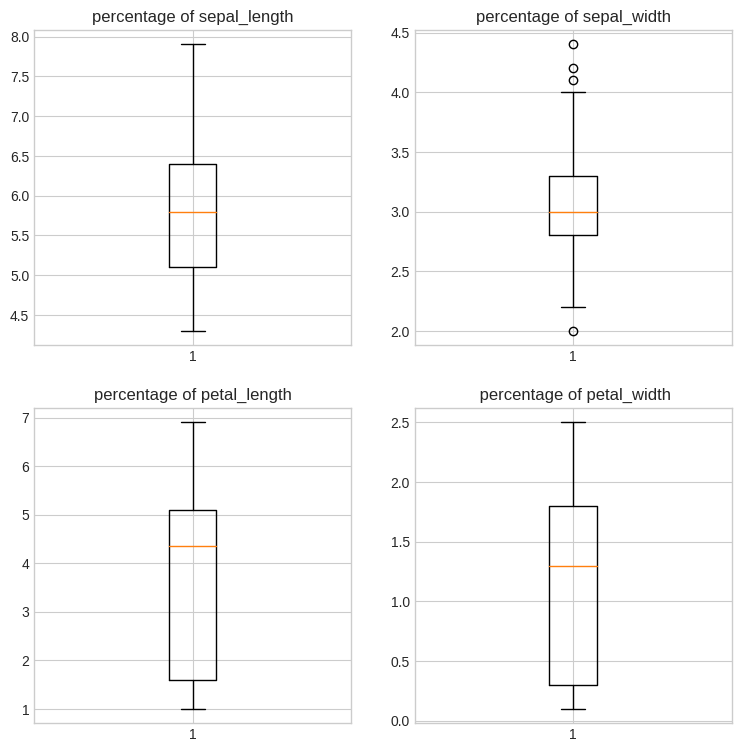

In [9]:
plt.figure(figsize = (9,9))
plt.style.use('seaborn-whitegrid')
ax=plt.subplot(221)
plt.boxplot(Iris['sepal_length'])
ax.set_title('percentage of sepal_length')
ax=plt.subplot(222)
plt.boxplot(Iris['sepal_width'])
ax.set_title('percentage of sepal_width')
ax=plt.subplot(223)
plt.boxplot(Iris['petal_length'])
ax.set_title('percentage of petal_length')
ax=plt.subplot(224)
plt.boxplot(Iris['petal_width'])
ax.set_title(' percentage of petal_width')

In [10]:
Q1 = Iris['sepal_length'].quantile(0.25)
Q3 = Iris['sepal_length'].quantile(0.75)
IQR = Q3 - Q1
filter = (Iris['sepal_length'] >= Q1 - 1.5 * IQR) & (Iris['sepal_length'] <= Q3 + 1.5 *IQR)
Iris=Iris.loc[filter]

<ipython-input-11-ceb5ee8eebfe>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'After removing outliers(sepal_length)')

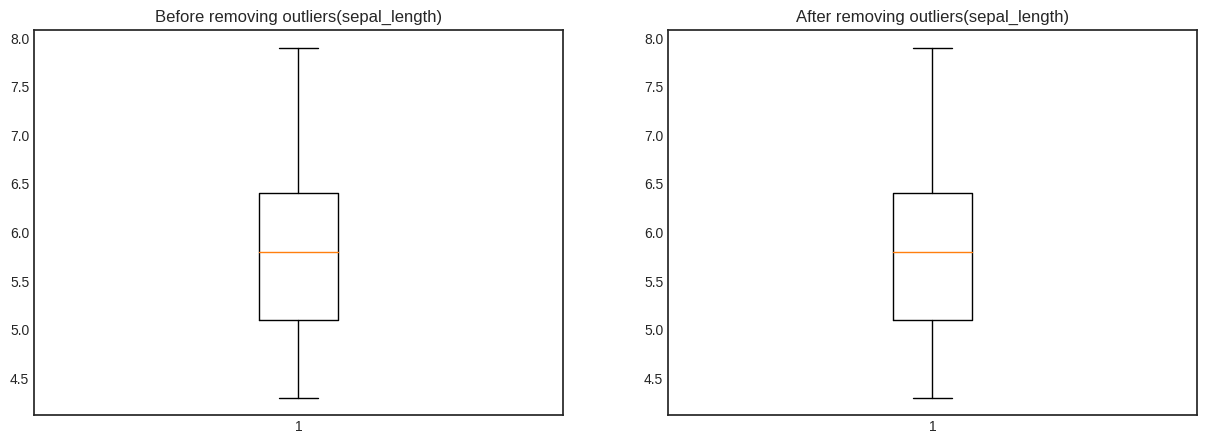

In [11]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(Iris['sepal_length'])
ax.set_title('Before removing outliers(sepal_length)')
ax=plt.subplot(122)
plt.boxplot(Iris['sepal_length'])
ax.set_title('After removing outliers(sepal_length)')

<Axes: xlabel='species', ylabel='count'>

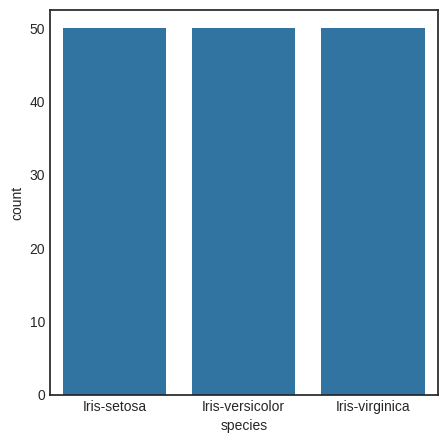

In [12]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x='species',data=Iris)

In [13]:
Iris.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

<Axes: >

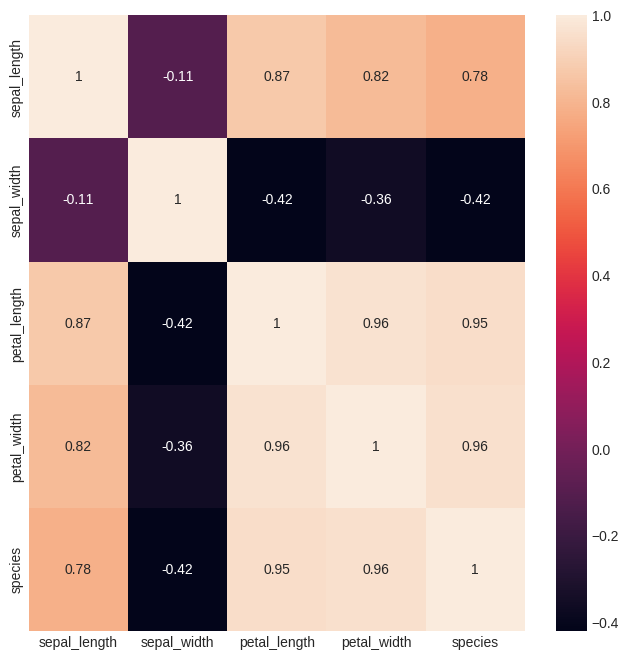

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(Iris.corr(),annot=True)

In [15]:
A=Iris.drop(columns='species')
B=Iris['species']
print(A,B)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
A_train,A_test,B_train,B_test=train_test_split(A,B,test_size=0.1,stratify=B,random_state=1)
A_train

,sepal_length,sepal_width,petal_length,petal_width
77,6.7,3.0,5.0,1.7
114,5.8,2.8,5.1,2.4
110,6.5,3.2,5.1,2.0
139,6.9,3.1,5.4,2.1
39,5.1,3.4,1.5,0.2
...,...,...,...,...
45,4.8,3.0,1.4,0.3
118,7.7,2.6,6.9,2.3
41,4.5,2.3,1.3,0.3
127,6.1,3.0,4.9,1.8


In [18]:
logreg=LogisticRegression()
logreg.fit(A_train,B_train)

LogisticRegression()

In [19]:
A_train_prediction=logreg.predict(A_train)
training_data_accuracy=accuracy_score(A_train_prediction,B_train)
print('accuracy for traning data is',training_data_accuracy)
A_test_prediction=logreg.predict(A_test)
test_data_accuracy=accuracy_score(A_test_prediction,B_test)
print('accuracy for test data is',test_data_accuracy)

accuracy for traning data is 0.9703703703703703
accuracy for test data is 0.9333333333333333


In [20]:
ab=DecisionTreeClassifier().fit(A_train,B_train)
A_train_prediction=ab.predict(A_train)
training_data_accuracy=accuracy_score(A_train_prediction,B_train)
print('accuracy for training data is',training_data_accuracy)
A_test_prediction=ab.predict(A_test)
test_data_accuracy=accuracy_score(A_test_prediction,B_test)
print('accuracy for test data is',test_data_accuracy)

accuracy for training data is 1.0
accuracy for test data is 0.9333333333333333


In [21]:
knn=KNeighborsClassifier()
knn.fit(A_train,B_train)

KNeighborsClassifier()

In [22]:
A_train_prediction=knn.predict(A_train)
training_Data_accuracy=accuracy_score(A_train_prediction,B_train)
print("accuracy for training data is",training_data_accuracy)
A_test_prediction=knn.predict(A_test)
test_data_accuracy=accuracy_score(A_test_prediction,B_test)
print('accuracy for test data is',test_data_accuracy)

accuracy for training data is 1.0
accuracy for test data is 0.9333333333333333


In [23]:
Data=(5.7,2.5,5.0,2.0)
Data_as_numpy_array=np.asarray(Data)

In [24]:
Data_reshaped=Data_as_numpy_array.reshape(1,-1)

In [25]:
print('Prediction Model    |    PredictedValues')
prediction=logreg.predict(Data_reshaped)
print('Logistic regression       ',prediction[0])
prediction=ab.predict(Data_reshaped)
print('Decision tree             ',prediction[0])
prediction=knn.predict(Data_reshaped)
print('Knn                       ',prediction[0])

Prediction Model    |    PredictedValues
Logistic regression        2
Decision tree              2
Knn                        2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
